/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape of the image tensor after preprocessing: torch.Size([3, 224, 224])


100%|██████████| 1000/1000 [01:23<00:00, 12.00it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


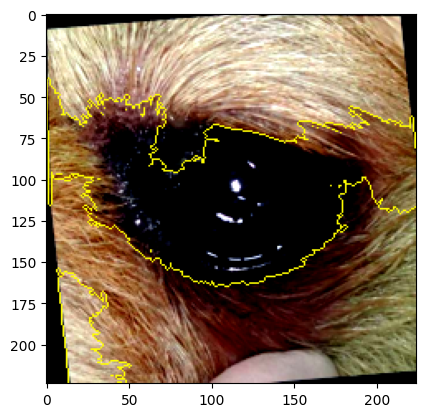

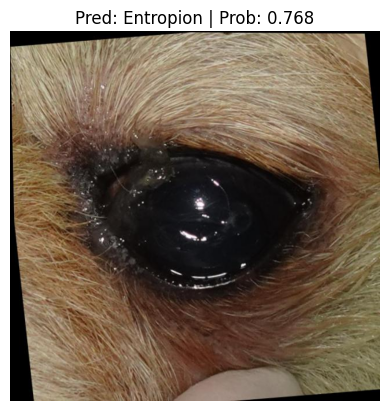

In [1]:
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from going_modular.going_modular.predictions import pred_and_plot_image

saved_model_path = "/Users/chamidiperera/Documents/FYP Codes/Care/backend/models/vit/eye/FinalizedModel/pretrained_vit_eye_final.pth"
pretrained_vit = torch.load(saved_model_path)
pretrained_vit.eval()

custom_image_path = "/Users/chamidiperera/Documents/FYP Codes/datasets/Eye Datasets/train/entropion/D0_0e58416f-60a5-11ec-8402-0a7404972c70_jpg.rf.c545ee3c6c9a98a8b79c5d0dbdfbf641.jpg"


transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),           
    transforms.Normalize(          
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


image = Image.open(custom_image_path)
image = image.convert("RGB")  
image = transform(image)     

print("Shape of the image tensor after preprocessing:", image.shape)



def predict_fn(images):

    images = torch.tensor(images)

    images = images.permute(0, 3, 1, 2)

    with torch.no_grad():
        outputs = pretrained_vit(images)
    return outputs


explainer = lime_image.LimeImageExplainer()


explanation = explainer.explain_instance(image.permute(1, 2, 0).numpy(), predict_fn, top_labels=5, num_samples=1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
image_boundry = mark_boundaries(temp / 2 + 0.5, mask)
plt.imshow(image_boundry)
plt.show()

class_names = ['Blepharitis','Conjunctivitis','Entropion','EyelidTumor','HealthyEye','Mastopathy','Nuclear Sclerosis','Pigmented Keratitis']
pred_and_plot_image(model=pretrained_vit, image_path=custom_image_path, class_names=class_names)

100%|██████████| 1000/1000 [01:22<00:00, 12.18it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


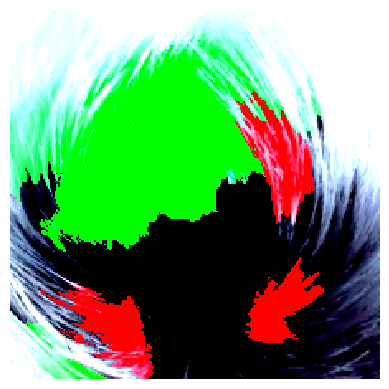

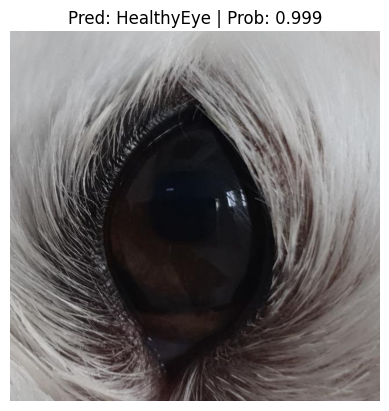

In [4]:
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from going_modular.going_modular.predictions import pred_and_plot_image

saved_model_path = "/Users/chamidiperera/Documents/FYP Codes/Care/backend/models/vit/eye/FinalizedModel/pretrained_vit_eye_final.pth"
pretrained_vit = torch.load(saved_model_path)
pretrained_vit.eval()

custom_image_path = "/Users/chamidiperera/Documents/FYP Codes/datasets/Eye Datasets/valid/healthy/D1_0c087a1c-60a5-11ec-8402-0a7404972c70_png.rf.98ce09c0e8aad1f83c35737ca332fa37.jpg"


transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),          
    transforms.Normalize(           
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


image = Image.open(custom_image_path)
image = image.convert("RGB")  
image = transform(image)   



def predict_fn(images):

    images = torch.tensor(images)

    images = images.permute(0, 3, 1, 2)
    with torch.no_grad():
        outputs = pretrained_vit(images)
    return outputs


explainer = lime_image.LimeImageExplainer()


explanation = explainer.explain_instance(image.permute(1, 2, 0).numpy(), predict_fn, top_labels=5, num_samples=1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)


plt.imshow(temp, cmap='jet', interpolation='nearest')
plt.axis('off')
plt.show()

class_names = ['Blepharitis','Conjunctivitis','Entropion','EyelidTumor','HealthyEye','Mastopathy','Nuclear Sclerosis','Pigmented Keratitis']
pred_and_plot_image(model=pretrained_vit, image_path=custom_image_path, class_names=class_names)